# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- 1 Which goods are selling off the shelves like crazy? Do they make more money
on high-end or low-end goods?
- 2 What is the typical customer's spending limit? Does it change depending on  where you live?
- 3 Where are the most devoted clients found? Which area is the most popular with customers?

## Import Semua Packages/Library yang Digunakan

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
import os
from scipy import stats
from google.colab import drive
import seaborn as sns

## Data Wrangling

### Gathering Data

convert drive

In [229]:
#for path save

main_path = "/content/main.csv"
geo_path = "/content/geo.csv"
q1png_path = "/content/q1.png"
q2png_path = "/content/q2.png"
q3png_path = "/content/q3.png"

In [306]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:
#check dir
dir = '/content/drive/MyDrive/dicoding/E-Commerce Public Dataset/'
print(os.listdir(dir))

['New Text Document.txt', 'order_payments_dataset.csv', 'order_reviews_dataset.csv', 'customers_dataset.csv', 'order_items_dataset.csv', 'geolocation_dataset.csv', 'products_dataset.csv', 'sellers_dataset.csv', 'product_category_name_translation.csv', 'orders_dataset.csv']


data dir serch and convert

In [232]:
order = pd.read_csv(dir + 'orders_dataset.csv')
item = pd.read_csv(dir + 'order_items_dataset.csv')
product = pd.read_csv(dir + 'products_dataset.csv')
payment = pd.read_csv(dir + 'order_payments_dataset.csv')
review = pd.read_csv(dir + 'order_reviews_dataset.csv')
customer = pd.read_csv(dir + 'customers_dataset.csv')
seller = pd.read_csv(dir + 'sellers_dataset.csv')
geolocation = pd.read_csv(dir + 'geolocation_dataset.csv')
category = pd.read_csv(dir + 'product_category_name_translation.csv')


save to dictionary

In [233]:
dic = {}
dic = {'order': order,
        'item': item,
        'product': product,
        'payment': payment,
        'review': review,
        'customer': customer,
        'seller': seller,
        'geol': geolocation,
        'category': category}

In [234]:
ch = []
ch = list(dic.keys())

for key in ch :
  display(dic[key].head())
  print("dictionary {}: \n".format(key))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


dictionary order: 



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


dictionary item: 



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


dictionary product: 



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


dictionary payment: 



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


dictionary review: 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


dictionary customer: 



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


dictionary seller: 



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


dictionary geol: 



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


dictionary category: 



**Insight:**
- xxx
- xxx

### Assessing Data

data type

In [235]:
for dfname, df in dic.items():
  print( dic[dfname].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  ob

In [236]:

order_datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

item_shipping_datetime_columns = ["shipping_limit_date"]

review_datetime_columns = ["review_creation_date","review_answer_timestamp"]

In [237]:
def columnstodatetime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column])

columnstodatetime(dic['order'], order_datetime_columns)
columnstodatetime(dic['item'], item_shipping_datetime_columns)
columnstodatetime(dic['review'], review_datetime_columns)

In [238]:

# Innit
duplicate_co = {}
totalsam_co = {}

# Count duplicates
def count_duplicates():
    dup = {}
    for dfname, df in dic.items():
        dup[dfname] = df.duplicated().sum()
    return dup

# Count total samples
def count_total_samples():
    tol = {}
    for dfname, df in dic.items():
        tol[dfname] = len(df)
    return tol


duplicate_co = count_duplicates()
totalsam_co = count_total_samples()

# dataframe
duplicatec_df = pd.DataFrame.from_dict( duplicate_co, orient='index', columns=['Duplicate Count'])
totalsamc_df = pd.DataFrame.from_dict(totalsam_co, orient='index', columns=['Total Sample Count'])



showing duplicate

In [239]:
pd.concat([totalsamc_df, duplicatec_df], axis=1)

,Total Sample Count,Duplicate Count
order,99441,0
item,112650,0
product,32951,0
payment,103886,0
review,99224,0
customer,99441,0
seller,3095,0
geol,1000163,261831
category,71,0


In [240]:

# Initialize a dictionary to store null value counts for each DataFrame
nullco = {}

# Calculate and store the null value counts for each DataFrame
for dfname, df in dic.items():
    nullco[dfname] = df.isna().sum()
    print("{} :\n {} \n".format(dfname,nullco[dfname]))

order :
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

item :
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

product :
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

payment :
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
d

**Insight:**
- xxx
- xxx

### Cleaning Data

order

In [241]:
print(dic['order']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [242]:
def getdat():
  return str(round((dic['order'].order_status.value_counts()['delivered']/len(dic['order']))*100,2))

print("still get {}% of data".format(getdat()))

still get 97.02% of data


In [243]:
def order_ids(df, status_column,id_column):
    return df[id_column][df[status_column] != 'delivered'].values

def filter_order_id(dic, delivered_order):
    for key, value in dic.items():
        if 'order_id' in value.columns:
            value.drop(value.loc[value['order_id'].isin(delivered_order)].index, inplace=True)

delivered_order_ids = order_ids(dic['order'], 'order_status', 'order_id')
filter_order_id(dic, delivered_order_ids)


In [244]:

def su(val,col):
  return str((val[col].isnull().sum() / len(val)) * 100)

for key, val in dic.items():
    for col in val.columns:
        if val[col].isnull().sum() > 0:
          print("{} % :{}".format(col,su(val,col)))

order_approved_at % :0.014511080246273761
order_delivered_carrier_date % :0.0020730114637533947
order_delivered_customer_date % :0.008292045855013579
product_category_name % :1.8512336499650999
product_name_lenght % :1.8512336499650999
product_description_lenght % :1.8512336499650999
product_photos_qty % :1.8512336499650999
product_weight_g % :0.006069618524475737
product_length_cm % :0.006069618524475737
product_height_cm % :0.006069618524475737
product_width_cm % :0.006069618524475737
review_comment_title % :88.36873839001255
review_comment_message % :59.4244559520968


In [245]:
def orders():
  return str(dic['order'].order_delivered_customer_date.isnull().sum())

print(" {} missing deliver date".format(orders()))

 8 missing deliver date


In [246]:

# getting all order id if it deliver
deliveries_null = dic['order']['order_id'][dic['order']['order_delivered_customer_date'].isnull()].values

# filetering every order if order data was consider as foreign key
for key, val in dic.items():
    if 'order_id' in val.columns:
        val.drop(val.loc[val['order_id'].isin(deliveries_null)].index, inplace = True)

In [247]:
# Add a new column 'delivered_on_time' to the 'orders' DataFrame

dic['order']['delivered_on_time'] = np.where(dic['order']['order_delivered_customer_date'] < dic['order']['order_estimated_delivery_date'], 'On Time', 'Late')

REVIEW

In [248]:
# Print the column names of the 'reviews' DataFrame
print('Review cols: ', dic['review'].columns.values)

Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [249]:
# The 'review_comment_title' column is 88% NaN, so it's not useful for analysis.
# Dropping this column.
review_drop_cols = ['review_comment_title']
dic['review'].drop(review_drop_cols, axis=1, inplace=True)

# We don't need to analyze text right now, so handling missing values in 'review_comment_message':
# If people did not leave a review comment, it's represented as NaN.
# Instead of dropping this column, we fill NaNs with 0 to indicate no comment,
# and replace all non-NaN values with 1 to indicate that a review comment exists.
dic['review']['review_comment_message'] = np.where(
    dic['review']['review_comment_message'].isnull(), 0, 1
)


PRODUCT

In [250]:
print('Product cols: ' , dic['product'].columns.values)

Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [251]:

# define the columns that need to be drop
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

# drop the colums
dic['product'].drop(product_drop_cols, axis= 1, inplace= True)


In [252]:
# Replace missing values in 'product_category_name' with 'outro'
# The assumption is that missing categories can be labeled as 'outro' (other).
dic['product']['product_category_name'].fillna(value='outro', inplace=True)

# Replace missing values in 'product_photos_qty' with 0
# This is based on the assumption that products with missing photo data
# likely have zero photos.
dic['product']['product_photos_qty'].fillna(value=0, inplace=True)


<ipython-input-252-46e379b4ebd2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dic['product']['product_category_name'].fillna(value='outro', inplace=True)
<ipython-input-252-46e379b4ebd2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

geolocation

In [253]:
# remove duplicate
dic['geol'].drop_duplicates(inplace=True)

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

Explore customer

In [254]:
dic['customer'].sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
60148,9431beb378db24408c2ff5419e2382ac,4dfeb6b99bc972ab0dcd1db4e187a827,30315,belo horizonte,MG
52858,a3a7a7e9325f146eaeea7cafbb1b5345,1c5d44eafa7759924213b552d9c44443,36820,divino,MG
76327,0d93e3fecae11d6f2348610c93841603,4f1a8d703d88162a87bf13b50ef9c75f,89224,joinville,SC
99208,91ee1e782c3e581c09b679fbf19224ea,80cd449260daad10832de001429d6908,6385,carapicuiba,SP
31664,fde3c24d146f729176c1311e953c9c0d,fb2f1b5cb4a9612511658f7351c25899,13590,dourado,SP
3050,2b470412ecfced59370259be526106ca,7bff95e83b82ed3228e004115e553731,14021,ribeirao preto,SP
18192,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG
58440,fa701810e6591470f5b1d0cb54d113d6,a4fc8ca14b452d822ca97a68ca438261,22411,rio de janeiro,RJ
13739,8e801893888e852d4d0b42a5cdc1ab0e,e8f406ba92b9d938ac7a9fc67261bfb0,88302,itajai,SC
56826,ee3a92568460bec769851bb443197a7a,564c03a40766b9b404572658fb74524d,47120,buritirama,BA


In [255]:
dic['customer'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [256]:
dic['customer'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Explore payments

In [257]:
dic['payment'].sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
6350,db2eafd064193f2bd9dd161490c09bd0,1,credit_card,4,195.91
24675,2edfd6d1f0b4cd0db4bf37b1b224d855,1,boleto,1,141.15
97721,de5518f86eca3ccfc00bb9ba13cdfffe,1,credit_card,4,216.71
94549,73960fc10fc7f6337ed0fe06f14bec36,1,credit_card,1,98.70
54497,deaad56e4aacebfa4f49a54a97420651,1,credit_card,2,85.58
16980,6744ba320cc05c157f4ce99347a87e12,1,boleto,1,57.29
82306,ced5db30352d0862742574c70723c843,1,credit_card,1,629.48
84134,2eff66aa79a98f80268d0632d8b0c6e1,1,credit_card,1,82.12
44144,430d466a33524c9953d7f2e25c6d3f06,1,credit_card,2,57.80
35769,d9eabc69f974b3d088e991cb7a7f08cd,1,credit_card,1,101.64


In [258]:
dic['payment'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,74297
boleto,19191
voucher,3679
debit_card,1484


Explore Payment

In [259]:
dic['payment'].sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
97819,694c72bb2f8ede1323820186544f9c09,2,voucher,1,29.02
39292,b2d6c7b5ebf482317945ef822da56002,1,credit_card,2,43.24
28340,447e7d42d8715bfbb6336d2dab784582,1,credit_card,9,95.40
37843,7a44c4fe71c5ad785748804827f628b8,1,credit_card,1,189.81
36750,f80ad99e797d6ae86865bed1ff9483dc,1,credit_card,2,29.33
41936,36d60fb57f3153d3296bf4738b68fff1,1,credit_card,2,211.17
81932,28146871b31f87883ea5283892d4ff1d,1,credit_card,8,88.90
9103,3556618d422d141f1b231ac5a1c9f7bd,1,credit_card,3,156.99
47956,188c13d1aa80d3a7ffc208eb983bf267,1,credit_card,10,614.21
45190,78febd227f47ed46eff1966e2b0b9b97,1,credit_card,6,66.01


In [260]:
dic['payment'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,74297
boleto,19191
voucher,3679
debit_card,1484


Explore order

In [261]:
dic['order'].sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
6122,6c6abb921625dd44d3d406ce4b890cac,d5961401e349bf22024305eef5fa9119,delivered,2018-05-02 00:13:29,2018-05-02 00:34:20,2018-05-03 16:51:00,2018-05-14 17:22:45,2018-06-01,On Time
58792,8ad2cc00eef89bdf0cb90d5bff14d90e,315cc3a08ccf817f0ef2437d5c57bace,delivered,2018-01-31 16:13:00,2018-02-01 03:12:30,2018-02-01 17:15:50,2018-02-19 17:37:11,2018-03-08,On Time
16317,07f375fa02d74b14cf7562276d6932f1,0c001e52f187db590c01e00cb5b8a1d2,delivered,2017-11-28 10:22:52,2017-11-28 10:40:49,2017-11-28 20:10:15,2017-12-15 19:49:24,2018-01-05,On Time
9115,1cb838bbf91e8e446a3fc49d56973c9a,6510bf0824930d09246d3b8cefe42363,delivered,2017-04-02 19:25:43,2017-04-02 19:35:21,2017-04-10 07:48:01,2017-04-17 08:48:52,2017-04-28,On Time
8504,35c3b3b2f196293240304eb8601b3d8c,d8c4d97b33c9868248a9fb5f1f4df2eb,delivered,2017-11-11 21:39:55,2017-11-11 21:50:26,2017-11-13 14:38:53,2017-12-29 21:09:48,2017-12-05,Late
59677,ad27f40c6dd9ac7017b460bb1ad492f3,067b4d25cd355be5e70f7e0b62f511b5,delivered,2017-12-25 19:26:11,2017-12-25 19:33:21,2017-12-28 01:09:06,2018-01-05 22:24:24,2018-02-05,On Time
87078,6b71838c4be9dce33810de87c333e365,8b1f6b37bd99fe9ccfb4a3fbffde8d44,delivered,2018-01-14 22:34:42,2018-01-15 22:30:47,2018-01-17 17:47:17,2018-01-18 21:45:59,2018-01-30,On Time
60351,5f1ade32bfea596b4d1ef813fa5afb72,a0522bb0aa2334c442b05fe4c48eafa4,delivered,2017-11-23 04:01:05,2017-11-24 03:09:55,2017-11-24 22:11:09,2017-11-27 18:24:25,2017-12-05,On Time
8370,f62e1cc968992b573558a1406edc8ccc,1442bed704b202edf2871f6797bf4b20,delivered,2018-01-03 20:18:19,2018-01-05 02:33:39,2018-01-08 14:49:11,2018-01-22 17:30:15,2018-01-30,On Time
49391,1a07bcd88f815b8098a7e112b3995323,303cd77319ef7c8b023153ca3d32ebd7,delivered,2018-04-17 09:55:21,2018-04-19 02:51:26,2018-04-20 19:22:28,2018-04-23 16:33:44,2018-05-04,On Time


In [262]:
dic['order']['delivered_on_time'].describe()

,delivered_on_time
count,96470
unique,2
top,On Time
freq,88644


 Explore customerdf and orderdf

In [263]:
# Merge order and customer
customerorder = pd.merge(
    left = dic['customer'],
    right = dic['order'],
    how ="left",
    left_on="customer_id",
    right_on="customer_id"
)
customerorder.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


In [292]:
# Merge payment and review

paymentreview = pd.merge(
    left=dic['payment'],
    right=dic['review'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
paymentreview.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [293]:
paymentreview.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03,2018-02-11 17:34:29


In [266]:
paymentreview.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

In [267]:
# Merge customer order and payment review

customer = pd.merge(
    left=customerorder,
    right=paymentreview,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


Explore item and seller

In [268]:
# Merge item and seller
itemseller = pd.merge(
    left=dic['item'],
    right=dic['seller'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
itemseller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [269]:
itemseller.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,661
curitiba,124
rio de janeiro,92
belo horizonte,65
ribeirao preto,50
ibitinga,49
guarulhos,48
santo andre,44
maringa,40


In [270]:
itemseller.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1769
PR,335
MG,236
SC,184
RJ,163
RS,125
GO,39
DF,30
ES,22


Explore product and category

In [271]:
# Merge product and category


productcat = pd.merge(
    left=dic['product'],
    right=dic['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
productcat.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [272]:
productcat.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [273]:
productcat.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


In [274]:
# Merge itemseller and productcat

sellerdf = pd.merge(
    left=itemseller,
    right=productcat,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellerdf.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,1.0,garden_tools


In [275]:

sellerdf.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english
3481,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP,utilidades_domesticas,2.0,housewares
109776,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR,pcs,4.0,computers
105488,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO,artes,2.0,art
72715,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP,eletroportateis,2.0,small_appliances
10996,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP,eletroportateis,2.0,small_appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56032,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP,beleza_saude,3.0,health_beauty
56047,8272b63d03f5f79c56e9e4120aec44ef,16,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP,beleza_saude,3.0,health_beauty
85206,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG,construcao_ferramentas_construcao,5.0,construction_tools_construction
27025,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG,construcao_ferramentas_construcao,5.0,construction_tools_construction


In [276]:
sellerdf.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

explore geol

In [277]:
dic['geol'].sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
680373,41940,-13.008251,-38.489131,salvador,BA
364087,16750,-21.298128,-50.728082,rubiacea,SP
689050,45200,-13.862728,-40.089642,jequie,BA
492481,25931,-22.610299,-43.176850,magé,RJ
664518,39628,-16.296875,-41.795655,comercinho,MG
502110,26900,-22.437809,-43.462955,miguel pereira,RJ
370726,17208,-22.275945,-48.554116,jaú,SP
789854,72225,-15.817320,-48.112487,brasilia,DF
457877,22793,-22.998389,-43.402286,rio de janeiro,RJ
863152,83408,-25.382655,-49.192736,colombo,PR


In [278]:
dic['geol'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


In [279]:
dic['geol'][dic['geol']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


all data explore

In [280]:
# not combining geo for better management

all = pd.merge(
    left=customer,
    right=sellerdf,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC,utilidades_domesticas,3.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP,casa_conforto,1.0,home_confort
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP,esporte_lazer,2.0,sports_leisure
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP,informatica_acessorios,3.0,computers_accessories
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP,outro,0.0,NaN
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ,brinquedos,5.0,toys
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR,moveis_decoracao,1.0,furniture_decor


In [281]:
alldf = all.drop_duplicates('order_id')

In [282]:
alldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 118685
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated_del

In [283]:
all.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


In [284]:
all.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})


order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

saving to csv for main

In [285]:
all.to_csv(main_path, index=False)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Which goods are selling off the shelves like crazy? Do they make more money on high-end or low-end goods?

In [286]:

items_product = dic['item'].merge(dic['product'], on='product_id', how='inner')
orders_ip = dic['order'].merge(items_product, on='order_id', how='inner')

# Create a pivot table to aggregate total items bought (sum of 'order_item_id') and average price
product_revenue = orders_ip.pivot_table(index='product_id', aggfunc={'order_item_id': 'sum', 'price': 'mean'})

product_revenue['total'] = product_revenue['order_item_id'] * product_revenue['price']
product_revenue.rename(columns={'order_item_id': 'sell_probability'}, inplace=True)
product_revenue['sell_probability'] /= len(product_revenue)

product_revenue = product_revenue.sort_values(by='total', ascending=False)


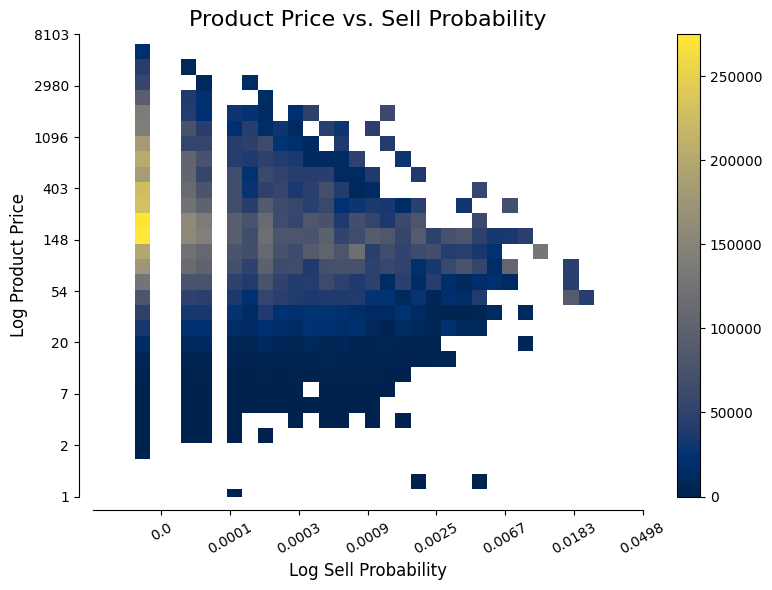

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))
        else:
            spine.set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


def plot_heatmap(x, y, revenue, title='Product Price vs. Sell Probability', output_file=None):
    fig, ax = plt.subplots(figsize=(8, 6))


    custom_plot(ax, ['bottom', 'left'])


    sns.histplot(x=x, y=y, weights=revenue, bins=30, cmap='cividis', ax=ax, cbar=True)

    plt.title(title, fontsize=16)
    plt.xlabel('Log Sell Probability', fontsize=12)
    plt.ylabel('Log Product Price', fontsize=12)


    plt.xlim(-11, -3)
    plt.ylim(0, 9)
    plt.xticks(range(-10, -2), [round(np.exp(x), 4) for x in range(-10, -2)], fontsize=10, rotation=30)
    plt.yticks(range(10), [int(np.exp(x)) for x in range(10)], fontsize=10)

    plt.tight_layout()


    if output_file:
        plt.savefig(output_file, dpi=300)
    else:
        plt.show()


x = np.log(product_revenue.sell_probability)
y = np.log(product_revenue.price)
revenue = product_revenue.total

# Plot heatmap
plot_heatmap(x, y, revenue, output_file= q1png_path)


### Pertanyaan 2:

In [311]:
pay_ord = order.merge(payment, on='order_id', how='outer').merge(customer, on='customer_id', how='outer')

customer_spent = pay_ord.groupby('customer_unique_id')['payment_value'].sum().sort_values(ascending=False)

customer_mean = customer_spent.mean()
customer_std = stats.sem(customer_spent)

confidence_interval = stats.t.interval(0.95, loc=customer_mean, scale=customer_std, df=len(customer_spent) - 1)

customer_regions = pay_ord.groupby('customer_state').agg({'payment_value': [np.mean, np.std], 'customer_unique_id': 'count'})
customer_regions.reset_index(inplace=True)

cis = stats.t.interval(0.95, loc=customer_regions['payment_value']['mean'], scale=customer_regions['payment_value']['std'] / np.sqrt(customer_regions['customer_unique_id']['count']), df=customer_regions['customer_unique_id']['count'] - 1)

customer_regions['ci_low'] = cis[0]
customer_regions['ci_hi'] = cis[1]


KeyError: "Column(s) ['payment_value'] do not exist"

In [312]:
print("Merged DataFrame columns:", pay_ord.columns.tolist())

Merged DataFrame columns: ['order_id_x', 'customer_id', 'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x', 'order_delivered_carrier_date_x', 'order_delivered_customer_date_x', 'order_estimated_delivery_date_x', 'delivered_on_time_x', 'payment_sequential_x', 'payment_type_x', 'payment_installments_x', 'payment_value_x', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id_y', 'order_status_y', 'order_purchase_timestamp_y', 'order_approved_at_y', 'order_delivered_carrier_date_y', 'order_delivered_customer_date_y', 'order_estimated_delivery_date_y', 'delivered_on_time_y', 'payment_sequential_y', 'payment_type_y', 'payment_installments_y', 'payment_value_y', 'review_id', 'review_score', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


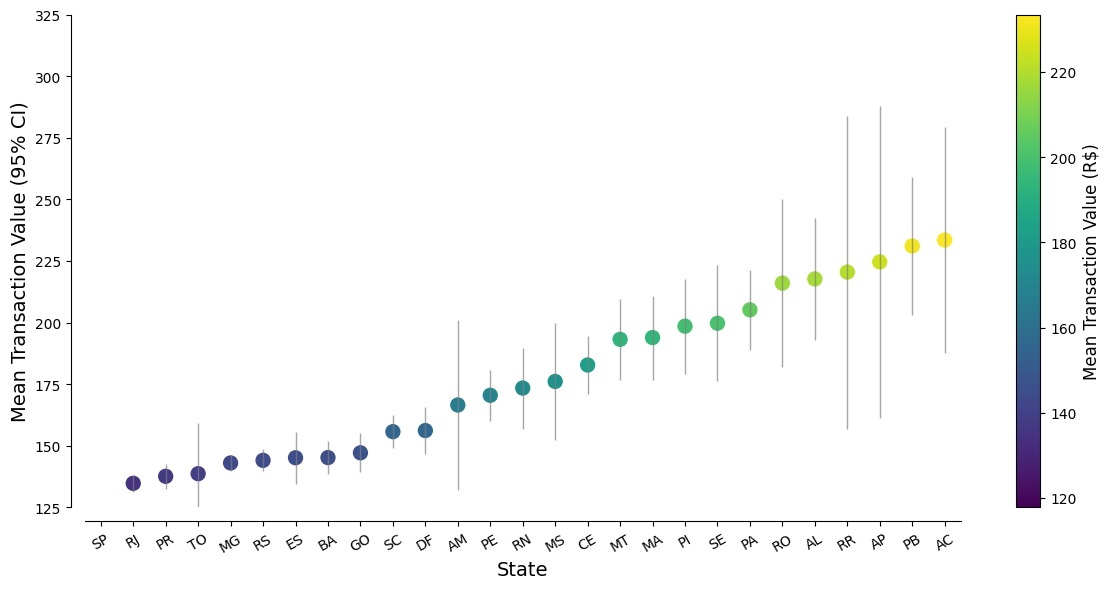

In [304]:
import matplotlib.pyplot as plt

def customize_axes(ax, spines):
    """Customize the axes for better readability."""

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')


    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))


    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')

    return ax

def plot_mean_transaction(customer_regions):
    """Plot mean transactions with confidence intervals by state."""

    sorted_data = customer_regions.sort_values(by=('payment_value_y', 'mean'))


    fig, ax = plt.subplots(figsize=(12, 6))
    ax = customize_axes(ax, ['left', 'bottom'])


    plt.xticks(rotation=30)
    plt.xlabel('State', fontsize=14)
    plt.ylabel('Mean Transaction Value (95% CI)', fontsize=14)
    plt.xlim(-0.5, len(sorted_data) - 0.5)
    plt.ylim(125, 325)


    scatter = ax.scatter(sorted_data['customer_state'],
                         sorted_data['payment_value_y']['mean'],
                         s=100,
                         c=sorted_data['payment_value_y']['mean'],
                         cmap='viridis')


    plt.vlines(sorted_data['customer_state'],
                sorted_data['ci_low'],
                sorted_data['ci_hi'],
                lw=1,
                color='gray',
                alpha=0.7)


    cbar = plt.colorbar(scatter)
    cbar.set_label('Mean Transaction Value (R$)', fontsize=12)

    plt.tight_layout()
    plt.savefig(q2png_path, dpi=300)
    plt.show()

plot_mean_transaction(customer_regions)


### Pertanyaan 3:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- 1 Which goods are selling off the shelves like crazy? Do they make more money on high-end or low-end goods?
Instead than depending on a small number of best-sellers, Olist makes money by offering a large range of goods, each of which has a low chance of being a big seller. The majority of products range in price from 50 to 500 R$, distributing their profits over a large number of items rather than just a few expensive ones.

- 2 What is the typical customer's spending limit? Does it change depending on where you live?
Most of the top 50 products enjoy an increase in sales on Black Friday, especially those that are already highly regarded all year long. This implies that even while sales peak around holidays like Black Friday, the best-selling items

- 3 Where are the most devoted clients found? Which area is the most popular with customers?
Customers are most prevalent in the Southeast and South, especially in major cities like São Paulo, Rio de Janeiro, and Porto Alegre. Olist's customer base is heavily concentrated in these urban locations, which reflects the urban shopping market.
